In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py
#%matplotlib widget, remove below if used
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36


In [2]:
side1_images = load_img_files("/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200914/*bmp")
#test_images = load_img_files("/home/data_transfer/data_from_windows/20200910/BeamProfile_Vacuum/Images/side_2025.bmp*")

/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200914/side1_1800_focal_point.bmp 0
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200914/side1_2025_focal_point.bmp 1
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200914/side1_1800_focal_point_x2profilling.bmp 2


In [3]:
side1_calibration_image_20200912=load_img_files("/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200912/side_focus_m135dbM_1800.bmp")[0]
side1_calibration_image_20200914=load_img_files("/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200914/side1_1800_focal_point.bmp")[0]

/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200912/side_focus_m135dbM_1800.bmp 0
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200914/side1_1800_focal_point.bmp 0


665
664
669


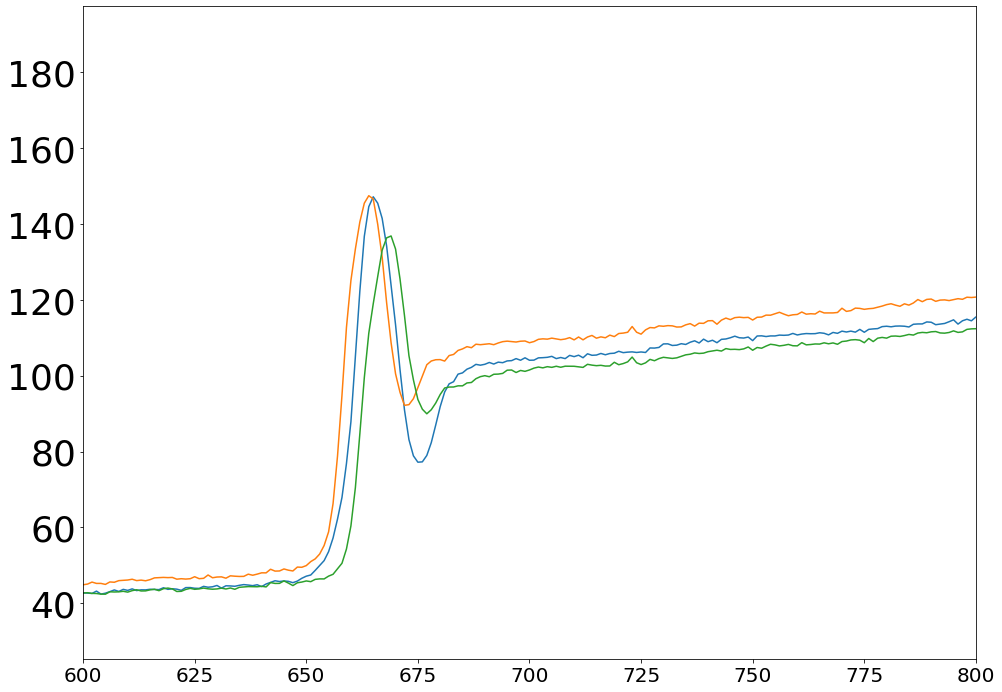

In [4]:
img = side1_images[2]
mean1=np.mean(side1_calibration_image_20200912,axis=1)
mean2=np.mean(side1_calibration_image_20200914,axis=1)
mean3=np.mean(img,axis=1)

print(600+np.argmax(mean1[600:800]))
print(600+np.argmax(mean2[600:800]))
print(600+np.argmax(mean3[600:800]))

plt.plot(mean1)
plt.plot(mean2)
plt.plot(mean3)
plt.xlim(600,800)
plt.show()

In [5]:
cal_pixel_to_size_side1=0.512

img1 = img[600:700]#side1_calibration_image_20200912[600:700]
img2 = side1_calibration_image_20200914[600:700]


shift, error, diffphase = phase_cross_correlation(img1,img2,
                                                          upsample_factor=100)
print(shift*cal_pixel_to_size_side1)


[1.67936 0.37888]


In [6]:
def var_to_pixel(y,a=257.281877240157,b= 2121.0163740069142):
    #threshold120,180:240,150:450
    x= (y-b)/a
    return x

def fft_phase_shift_to_pixel(y,a=-0.49236667413362056,b=0.023437187677700422):
    x= (y-b)/a
    return x

In [7]:
top_images = load_img_files("/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/*")


/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/top_fp_170.bmp 0
/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/top_zoom_fp_1666.bmp 1
/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/170_fp_x2_top.bmp 2
/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/top_zoom_fp_x2_1666.bmp 3
/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/side2_44_0_fp_x2.bmp 4


In [8]:
top_zoom_calibration_image_20200912=load_img_files("/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200912/focal_point/top_zoom_1666_m135dBm.bmp")[0]
top_zoom_calibration_image_20200914=load_img_files("/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/top_zoom_fp_1666.bmp")[0]

/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200912/focal_point/top_zoom_1666_m135dBm.bmp 0
/home/data_transfer/slowcontrol_data/ImageAnalysis/PositionCalibration_20200914/top_zoom_fp_1666.bmp 0


In [9]:
from skimage.filters import window
img1=top_zoom_calibration_image_20200912 * window('blackman', top_zoom_calibration_image_20200912.shape)
img2=top_zoom_calibration_image_20200914 #* window('blackman', top_zoom_calibration_image_20200914.shape)
img3=top_images[3]

shift, error, diffphase = phase_cross_correlation(img1[200:300,150:450],img3[200:300,150:450],upsample_factor=1000)

print(shift)
print(fft_phase_shift_to_pixel(shift[0]))

[-0.972  5.674]
2.0217395692535325


2.2563230585574985


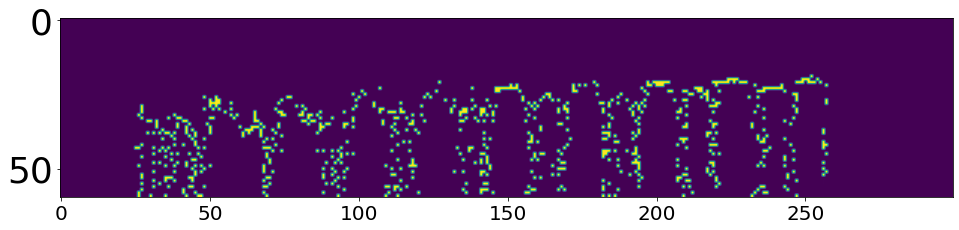

In [10]:
img1=top_zoom_calibration_image_20200912
img2=top_zoom_calibration_image_20200914

t_3 = threshold_image(img3,120,256)
t_cal = threshold_image(img2,120,256)

diff_image=t_cal[180:240,150:450]-t_3[180:240,150:450]
print(var_to_pixel(np.var(diff_image)))
plt.imshow(diff_image)




In [25]:
# inital shield data 
shield_images = load_img_files("/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/*")
#shield_images = shield_images[0:5]

/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/after_moving.bmp 0
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_in_initial.bmp 1
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/side_after_side_spin_installation.bmp 2
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/started_shield_vi.bmp 3
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/side_after_spin_2.bmp 4
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_and_attractor_85um.bmp 5
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_attractor_behind_374_37.bmp 6
/home/data_transfer/data_from_windows/ImageAnalysis/Positi

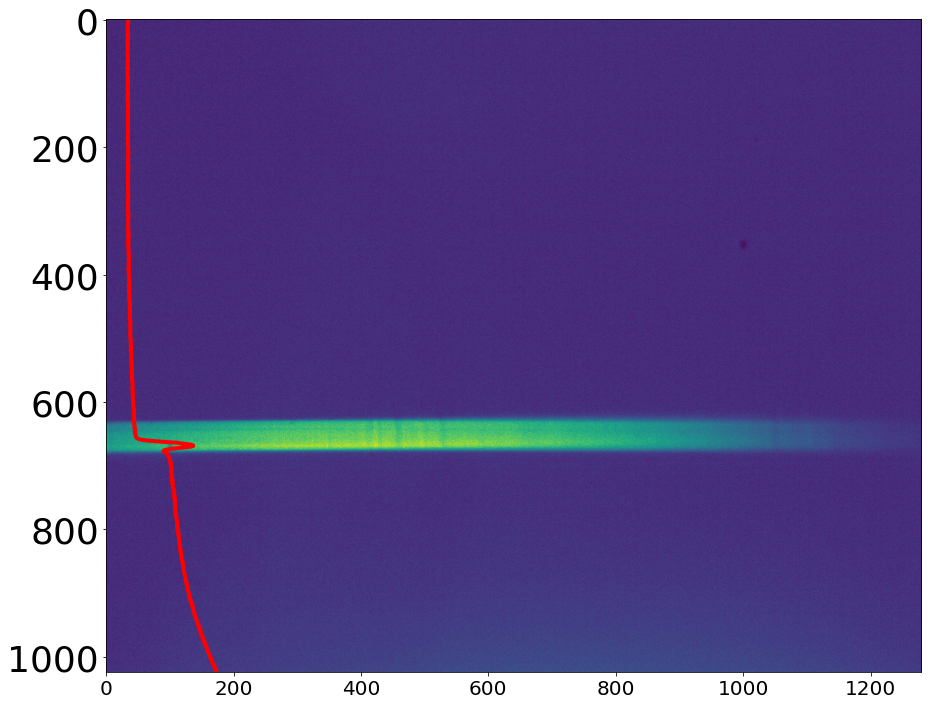

In [20]:
mean = np.mean(side1_images[2],axis=1)
plt.plot(mean,np.arange(0,len(mean),1),color="red",linewidth=4)
plt.imshow(shield_images[0])


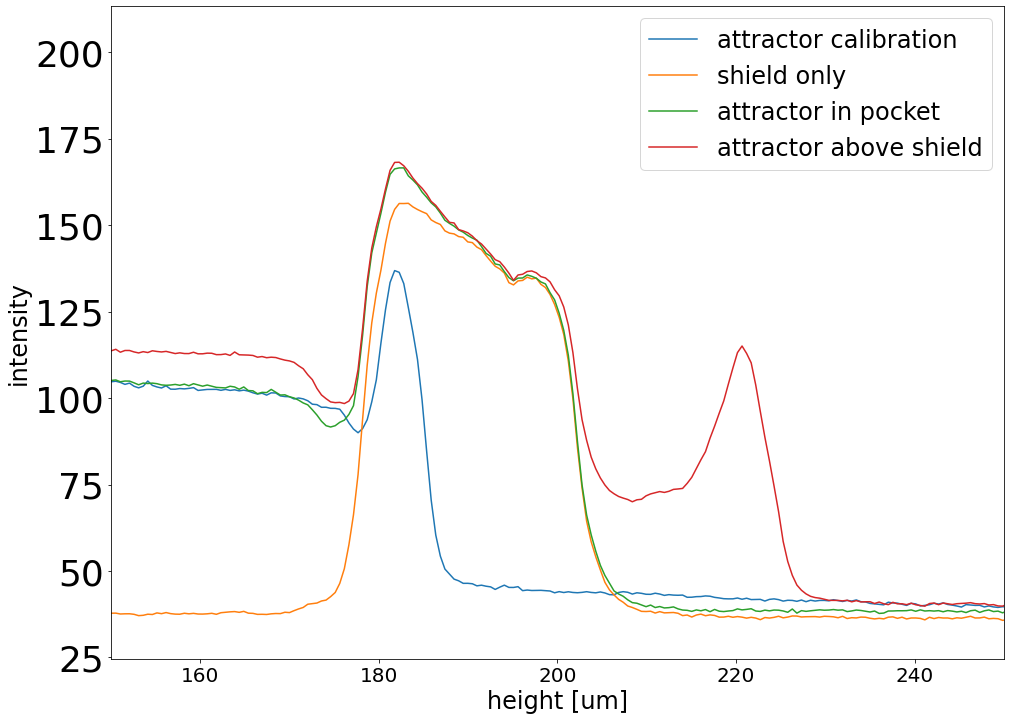

In [46]:
x= np.arange(0,1024*0.512,1*0.512)
plt.plot(1024*0.512-x,mean,label="attractor calibration")
plt.plot(1024*0.512-x,np.mean(shield_images[4],axis=1),label="shield only")
plt.plot(1024*0.512-x,np.mean(shield_images[14],axis=1),label="attractor in pocket")
plt.plot(1024*0.512-x,np.mean(shield_images[8],axis=1),label="attractor above shield")
plt.xlim(150,250)
plt.legend()
plt.ylabel("intensity")
plt.xlabel("height [um]")
plt.show()

In [14]:
low_x = 200
high_x =1000

dis = (high_x-low_x)*0.512
print(dis)

img1 = shield_images[0]
img2 = shield_images[2]


shift, error, diffphase = phase_cross_correlation(img1,img2,
                                                          upsample_factor=1000)
print(shift)#*0.512)
print(shift*0.512/(dis))

409.6
[ 0.271 -0.002]
[ 3.3875e-04 -2.5000e-06]


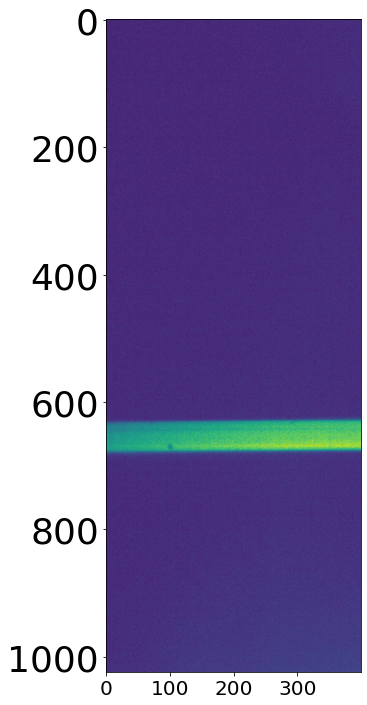

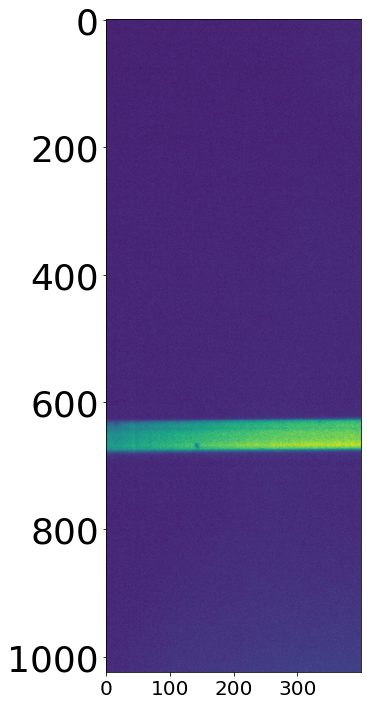

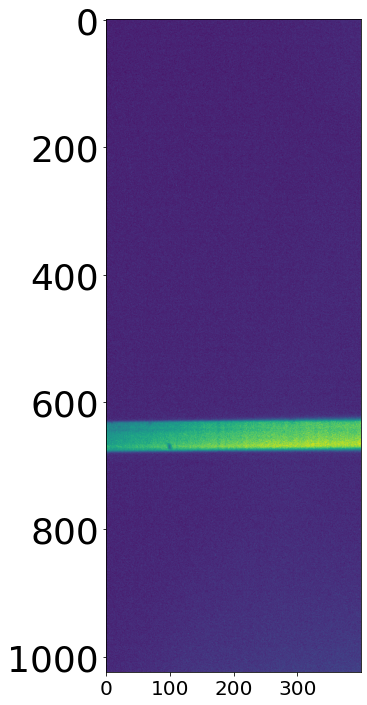

In [15]:
plt.imshow(shield_images[0][::,0:400])
plt.show()
plt.imshow(shield_images[2][::,0:400])
plt.show()
plt.imshow(shield_images[1][::,0:400])

In [16]:
shield_and_attr_images = load_img_files("/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/*attr*")

/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_and_attractor_85um.bmp 0
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_attractor_behind_374_37.bmp 1
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_attractor_behind_374_40.bmp 2
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_and_attractor_374_60.bmp 3
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_and_attractor_3889_84.bmp 4
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_attractor_behind_374_100_33.bmp 5
/home/data_transfer/data_from_windows/ImageAnalysis/PositionCalibration/20200913/Attractor_in_Shield_Test/shield_and_attractor_374_100_60.bmp 6
/hom

(150.0, 250.0)

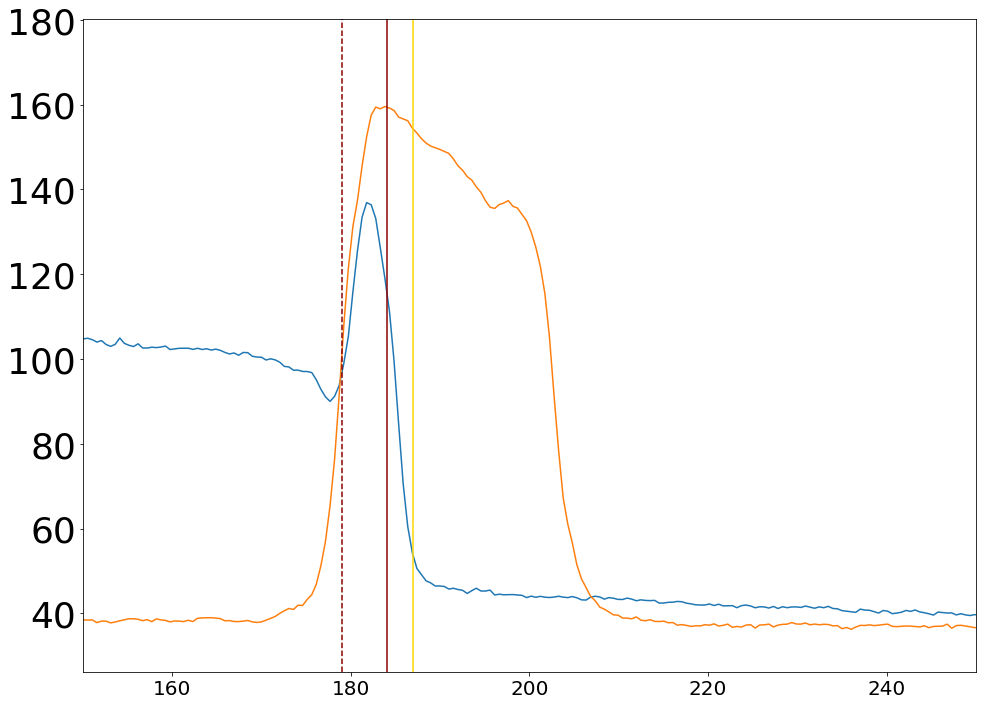

In [17]:
x= np.arange(0,1024*0.512,1*0.512)
plt.plot(1024*0.512-x,mean)
#plt.plot(1024*0.512-x,np.mean(shield_and_attr_images[9],axis=1))
#plt.plot(1024*0.512-x,np.mean(shield_and_attr_images[7],axis=1))
#plt.plot(1024*0.512-x,np.mean(shield_and_attr_images[5],axis=1))
plt.plot(1024*0.512-x,np.mean(shield_images[2],axis=1))

plt.axvline(179,linestyle="dashed",color="darkred")
plt.axvline(184,color="darkred")

plt.axvline(187,color="gold")
plt.axvline()
#plt.axvline(193)
#plt.axvline(221-37.5)
plt.xlim(150,250)

In [151]:
201=40
187.5

32